### 1. DNN을 통한 분류

#### ※ 앞으로 궁금할 상식: 분류 학습에서 왜 Cross Entropy를 사용할 때, output layer에 activation function을 안쓰는걸까?
* (Binary) Cross Entropy에 이미 activation(예: sigmoid, softmax)이 내재되어 있어, 1차로 output의 features(Not categorical)를 activation 해준 후에, 2차로 CE loss 계산

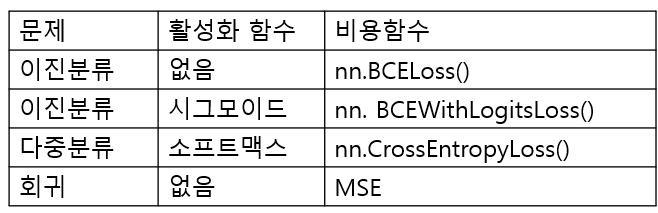

### 2. wine.csv 데이터셋 기반 DNN 이진분류

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.csv')

# 화이트 와인(0)인지 레드와인(1)인지
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # 2차원으로 만들어야함. 모델 예측은 2차원으로 나오기 때문
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred) # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item() # 맞춘 값드를 더한 다음에
        total += y_batch.size(0) # 해당 미니배치 데이터 셋 갯수를 구해놓고

    accuracy = correct / total # 맞춘것들 누적 / 미니배치 데이터셋 갯수 누적
    print(f'Accuracy: {accuracy:.4f}')


Epoch 1/10, Loss: 0.0722
Epoch 2/10, Loss: 0.1342
Epoch 3/10, Loss: 0.0167
Epoch 4/10, Loss: 0.0266
Epoch 5/10, Loss: 0.0045
Epoch 6/10, Loss: 0.0111
Epoch 7/10, Loss: 0.0039
Epoch 8/10, Loss: 0.0046
Epoch 9/10, Loss: 0.0054
Epoch 10/10, Loss: 0.0381
Accuracy: 0.9977


### 실습) wine.csv 데이터셋 기반 DNN 이진분류를 누군가 코드를 망쳐놨다. 고쳐보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.csv')

# 화이트 와인(0)인지 레드와인(1)인지
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # 2차원으로 만들어야함. 모델 예측은 2차원으로 나오기 때문
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.bn1 = nn.BatchNorm1d(8)
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(8, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.dropout2 = nn.Dropout(0.5)
        self.layer3 = nn.Linear(16, 16)
        self.bn3 = nn.BatchNorm1d(16)
        self.dropout3 = nn.Dropout(0.5)
        self.layer4 = nn.Linear(16, 8)
        self.bn4 = nn.BatchNorm1d(8)
        self.dropout4 = nn.Dropout(0.5)
        self.layer5 = nn.Linear(8, 1)  # 수정
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout4(x)
        x = self.relu(self.layer2(x))
        x = self.dropout4(x)
        x = self.relu(self.layer3(x))
        x = self.dropout4(x)
        x = self.relu(self.layer4(x))
        x = self.dropout4(x)
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

criterion = nn.BCEWithLogitsLoss()           # 수정
optimizer = optim.SGD(model.parameters(), lr=0.05)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred)   # 시그모이드를 통과해서 확률값 구함  # 수정
        y_pred = (y_pred > 0.5).float()# 수정
        correct += (y_pred == y_batch).sum().item()# 수정
        total += y_batch.size(0)

    accuracy =correct /total# 수정
    print(f'Accuracy: {accuracy:.4f}')


Epoch 1/10, Loss: 0.5461
Epoch 2/10, Loss: 0.6282
Epoch 3/10, Loss: 0.6238
Epoch 4/10, Loss: 0.4975
Epoch 5/10, Loss: 0.3440
Epoch 6/10, Loss: 0.5792
Epoch 7/10, Loss: 0.3218
Epoch 8/10, Loss: 0.1444
Epoch 9/10, Loss: 0.2250
Epoch 10/10, Loss: 0.0850
Accuracy: 0.9946


### 3. wine.csv 데이터셋 기반 DNN 이진분류

1). accracy

2). f1_score

3). confusion matrix

4). precision

5). recall

을 출력해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

df = pd.read_csv('wine.csv')

# 화이트 와인(0)인지 레드와인(1)인지
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # 2차원으로 만들어야함. 모델 예측은 2차원으로 나오기 때문
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_preds = []
    y_trues = []
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred)  # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()  # 0.5를 기준으로 이진화
        # 0또는 1로 최종 결과 값으로 바뀜

        y_preds.extend(y_pred.view(-1).tolist()) # 예측값 1d리스트 타입으로 바꿈
        y_trues.extend(y_batch.view(-1).tolist())# 예측값 1d리스트 타입으로 바꿈

    # 성능 지표 계산
    accuracy = accuracy_score(y_trues, y_preds)
    f1 = f1_score(y_trues, y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    precision = precision_score(y_trues, y_preds)
    recall = recall_score(y_trues, y_preds)

    # 결과 출력
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')


Epoch 1/10, Loss: 0.0397
Epoch 2/10, Loss: 0.0018
Epoch 3/10, Loss: 0.0048
Epoch 4/10, Loss: 0.0016
Epoch 5/10, Loss: 0.3333
Epoch 6/10, Loss: 0.0050
Epoch 7/10, Loss: 0.0020
Epoch 8/10, Loss: 0.0111
Epoch 9/10, Loss: 0.0023
Epoch 10/10, Loss: 0.0038
Accuracy: 0.9977
F1 Score: 0.9953
Confusion Matrix:
[[980   0]
 [  3 317]]
Precision: 1.0000
Recall: 0.9906


### 4. wine.csv 데이터셋 기반 DNN 이진분류 - 클래스 불균형 해결

SMOTE를 사용해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

df = pd.read_csv('wine.csv')
df['class'].value_counts()

,count
class,
0,4898
1,1599


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values   # 화이트 와인: 0, 레드 와인: 1

# 데이터셋 분리 (훈련 및 테스트 셋)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# SMOTE 적용 후 클래스 분포 확인
print(f"After SMOTE: \n{pd.Series(y_train_resampled).value_counts()}")

After SMOTE: 
0    3918
1    3918
Name: count, dtype: int64


In [ ]:
# 데이터 정규화
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 데이터를 텐서로 변환
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1)  # 2차원으로 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# 데이터셋과 데이터로더 준비
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# DNN 모델 정의
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 16)
        self.layer4 = nn.Linear(16, 8)
        self.layer5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

input_dim = X_train.shape[1]
model = DNN(input_dim)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_preds = []
    y_trues = []
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = torch.sigmoid(y_pred)  # 시그모이드를 통과해서 확률값 구함
        y_pred = (y_pred > 0.5).float()  # 0.5를 기준으로 이진화
        y_preds.extend(y_pred.view(-1).tolist())
        y_trues.extend(y_batch.view(-1).tolist())

    # 성능 지표 계산
    accuracy = accuracy_score(y_trues, y_preds)
    f1 = f1_score(y_trues, y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    precision = precision_score(y_trues, y_preds)
    recall = recall_score(y_trues, y_preds)

    # 결과 출력
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

Epoch 1/10, Loss: 0.0247
Epoch 2/10, Loss: 0.0099
Epoch 3/10, Loss: 0.1199
Epoch 4/10, Loss: 0.0085
Epoch 5/10, Loss: 0.0046
Epoch 6/10, Loss: 0.0039
Epoch 7/10, Loss: 0.0038
Epoch 8/10, Loss: 0.0026
Epoch 9/10, Loss: 0.0056
Epoch 10/10, Loss: 0.0041
Accuracy: 0.9985
F1 Score: 0.9969
Confusion Matrix:
[[980   0]
 [  2 318]]
Precision: 1.0000
Recall: 0.9938


### 같이해보는 실습) 타이타닉 데이터셋으로 MLP 모델을 이용하여 생존분류를 해보자  

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,424
1,288


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('titanic.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True) # nan값이면 삭제하고 실제로 반영

# 범주형 컬럼 라벨 인코더로 숫자로 바꿈
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# 정답값 빼고 X정의
X = df.drop('Survived', axis=1).values

# 정답값만 가져오기
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, 16)
        self.layer2 = nn.Linear(16, 32)
        self.layer3 = nn.Linear(32, 64)
        self.layer4 = nn.Linear(64, 64)
        self.layer5 = nn.Linear(64, 32)
        self.layer6 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.relu(self.layer5(x))
        x = self.sigmoid(self.layer6(x))
        return x

input_dim = X_train.shape[1]
model = MLP(input_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = correct / total
    print(f'Accuracy: {accuracy:.4f}')


Epoch 1/50, Loss: 0.6882
Epoch 2/50, Loss: 0.6864
Epoch 3/50, Loss: 0.6872
Epoch 4/50, Loss: 0.6882
Epoch 5/50, Loss: 0.6981
Epoch 6/50, Loss: 0.6956
Epoch 7/50, Loss: 0.6769
Epoch 8/50, Loss: 0.6683
Epoch 9/50, Loss: 0.6590
Epoch 10/50, Loss: 0.6900
Epoch 11/50, Loss: 0.6570
Epoch 12/50, Loss: 0.6741
Epoch 13/50, Loss: 0.6906
Epoch 14/50, Loss: 0.6831
Epoch 15/50, Loss: 0.6441
Epoch 16/50, Loss: 0.6691
Epoch 17/50, Loss: 0.6577
Epoch 18/50, Loss: 0.5907
Epoch 19/50, Loss: 0.6342
Epoch 20/50, Loss: 0.5972
Epoch 21/50, Loss: 0.6541
Epoch 22/50, Loss: 0.5426
Epoch 23/50, Loss: 0.5299
Epoch 24/50, Loss: 0.4771
Epoch 25/50, Loss: 0.6056
Epoch 26/50, Loss: 0.5816
Epoch 27/50, Loss: 0.4814
Epoch 28/50, Loss: 0.4129
Epoch 29/50, Loss: 0.5111
Epoch 30/50, Loss: 0.5807
Epoch 31/50, Loss: 0.6035
Epoch 32/50, Loss: 0.4491
Epoch 33/50, Loss: 0.3604
Epoch 34/50, Loss: 0.6010
Epoch 35/50, Loss: 0.6182
Epoch 36/50, Loss: 0.5537
Epoch 37/50, Loss: 0.4614
Epoch 38/50, Loss: 0.2545
Epoch 39/50, Loss: 0.

### 5. 타이타닉 데이터셋으로 MLP 모델을 이용하여 생존분류를 해보자 - 클래스 불균형 해결

SMOTENC를 사용해보자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTENC

# 데이터 로드 및 전처리
df = pd.read_csv('titanic.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True)

# 각 클래스가 몇개인지 보자
print(df['Survived'].value_counts())

Survived
0    424
1    288
Name: count, dtype: int64


In [ ]:
# 범주형 변수 인코딩
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1).values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 범주형 변수 인덱스 (Pclass, Sex, Embarked)
categorical_features = [0, 1, 4]

# SMOTE-NC 적용
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)



# 범주형과 수치형 변수를 고려하여 , 클래스 균형에 맞게 데이터를 upsampleing 한 결과
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# 정규화
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 텐서변환
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

input_dim = X_train.shape[1]
model = MLP(input_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y_batch).sum().item()
        total += y_batch.size(0)

    accuracy = correct / total


Epoch 1/50, Loss: 0.5304
Epoch 2/50, Loss: 0.6868
Epoch 3/50, Loss: 0.6178
Epoch 4/50, Loss: 0.4012
Epoch 5/50, Loss: 0.6851
Epoch 6/50, Loss: 0.7146
Epoch 7/50, Loss: 0.4431
Epoch 8/50, Loss: 0.7980
Epoch 9/50, Loss: 0.1505
Epoch 10/50, Loss: 0.0982
Epoch 11/50, Loss: 0.2655
Epoch 12/50, Loss: 0.9326
Epoch 13/50, Loss: 0.3862
Epoch 14/50, Loss: 0.1604
Epoch 15/50, Loss: 0.2623
Epoch 16/50, Loss: 0.1762
Epoch 17/50, Loss: 0.2672
Epoch 18/50, Loss: 0.6393
Epoch 19/50, Loss: 0.5768
Epoch 20/50, Loss: 0.8420
Epoch 21/50, Loss: 0.5342
Epoch 22/50, Loss: 0.2515
Epoch 23/50, Loss: 0.6670
Epoch 24/50, Loss: 0.9592
Epoch 25/50, Loss: 0.4756
Epoch 26/50, Loss: 0.3280
Epoch 27/50, Loss: 0.3350
Epoch 28/50, Loss: 0.6400
Epoch 29/50, Loss: 0.6416
Epoch 30/50, Loss: 0.1037
Epoch 31/50, Loss: 0.4178
Epoch 32/50, Loss: 0.5010
Epoch 33/50, Loss: 0.3241
Epoch 34/50, Loss: 0.0694
Epoch 35/50, Loss: 0.2882
Epoch 36/50, Loss: 0.6777
Epoch 37/50, Loss: 0.1137
Epoch 38/50, Loss: 0.5520
Epoch 39/50, Loss: 0.

### 3. iris.csv 데이터셋 기반 MLP 다중분류

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
df = pd.read_csv('iris.csv')
df['variety'] = LabelEncoder().fit_transform(df['variety'])
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
df = pd.read_csv('iris.csv')
df['variety'] = LabelEncoder().fit_transform(df['variety'])
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

'''
# 방법 1: nn.Sequential()과 add_module 사용

model = nn.Sequential()
model.add_module('fc1', nn.Linear(4, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 3))

# 방법 2: nn.Sequential() 안에 직접 레이어 정의
model = nn.Sequential(
     nn.Linear(4, 100),  # input_layer = 4, hidden_layer1 = 100
     nn.ReLU(),
     nn.Linear(100, 100),  # hidden_layer2 = 100, hidden_layer3 = 100
     nn.ReLU(),
     nn.Linear(100, 3)  # hidden_layer3 = 100, output_layer = 3
     )
'''
# 방법 3: nn.Module을 상속하는 클래스 정의
class MultiLayerRegression(nn.Module):
    def __init__(self):
        super(MultiLayerRegression, self).__init__()
                                                # X_train이 데이터 X 피처갯수의 shape을 가지는데 거기서 인덱스 1(피처갯수)
        self.linear1 = nn.Linear(X_train.shape[1], 100)  # input_layer = X_train.shape[1], hidden_layer1 = 100
        self.activate1 = nn.ReLU()
        self.linear2 = nn.Linear(100, 100)  # hidden_layer2 = 100, hidden_layer3 = 100
        self.activate2 = nn.ReLU()
        self.linear3 = nn.Linear(100, len(set(y)))  # hidden_layer3 = 100, output_layer = len(set(y))

    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.activate1(out1)
        out3 = self.linear2(out2)
        out4 = self.activate2(out3)
        out5 = self.linear3(out4)
        return out5

model = MultiLayerRegression()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

patience = 5
best_loss = float('inf')
early_stop_counter = 0

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        early_stop_counter = 0

    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print("Early stopping triggered")
        break

model.eval()
with torch.no_grad():
    y_pred = []
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')


Epoch 1/50, Loss: 0.9083, Val Loss: 0.9083
Epoch 2/50, Loss: 0.7948, Val Loss: 0.7948
Epoch 3/50, Loss: 0.6974, Val Loss: 0.6974
Epoch 4/50, Loss: 0.6142, Val Loss: 0.6142
Epoch 5/50, Loss: 0.5449, Val Loss: 0.5449
Epoch 6/50, Loss: 0.4897, Val Loss: 0.4897
Epoch 7/50, Loss: 0.4433, Val Loss: 0.4433
Epoch 8/50, Loss: 0.4057, Val Loss: 0.4057
Epoch 9/50, Loss: 0.3740, Val Loss: 0.3740
Epoch 10/50, Loss: 0.3470, Val Loss: 0.3470
Epoch 11/50, Loss: 0.3251, Val Loss: 0.3251
Epoch 12/50, Loss: 0.3053, Val Loss: 0.3053
Epoch 13/50, Loss: 0.2886, Val Loss: 0.2886
Epoch 14/50, Loss: 0.2725, Val Loss: 0.2725
Epoch 15/50, Loss: 0.2584, Val Loss: 0.2584
Epoch 16/50, Loss: 0.2437, Val Loss: 0.2437
Epoch 17/50, Loss: 0.2294, Val Loss: 0.2294
Epoch 18/50, Loss: 0.2156, Val Loss: 0.2156
Epoch 19/50, Loss: 0.2011, Val Loss: 0.2011
Epoch 20/50, Loss: 0.1862, Val Loss: 0.1862
Epoch 21/50, Loss: 0.1710, Val Loss: 0.1710
Epoch 22/50, Loss: 0.1590, Val Loss: 0.1590
Epoch 23/50, Loss: 0.1471, Val Loss: 0.14

# ★ 실무 실습) 배포 받은 "신용카드 사용자 연체 예측"를 통해 자신만의 코드를 작성 해보자

[사람의 정보를 넣어서 신용을 분류예측 하는 모델을 만들어 보자!]

1. credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (0,1,2)=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.
3. 이제까지 배운 분류 방법들을 통해 적용해보자.
4. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기

<ipython-input-101-61b28318da64>:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv('train.csv', sep=',', skiprows=[16002,23976]) # Skip the line before the error


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

data_train = pd.read_csv('train.csv', sep=',', skiprows=[16002,23976]) # Skip the line before the error
data_train = data_train.drop_duplicates(subset=['index']).reset_index(drop=True)
data_train = data_train.fillna('no jop')
data_train.drop(columns = ['index'],inplace = True)

# 1. Label Encoding 적용 (이미 된 부분이라 가정)
label_encoder = LabelEncoder()
for column in data_train.columns:
    if data_train[column].dtype == 'object':
        data_train[column] = label_encoder.fit_transform(data_train[column].astype(str))

# 2. 범주형 열 인덱스 확인 (라벨 인코딩된 열)
categorical_features = [i for i, col in enumerate(data_train.columns) if data_train[col].dtype == 'int64']

# 3. X와 y 설정
X = data_train.iloc[:, :-1].values  # 마지막 열 제외
y = data_train.iloc[:, -1].values  # 마지막 열

# 4. 훈련 데이터와 테스트 데이터 분할 (stratify로 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. 범주형 변수를 제외한 수치형 열에 대해 스케일링 적용
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class MultiLayerRegression(nn.Module):
    def __init__(self):
        super(MultiLayerRegression, self).__init__()
                                                # X_train이 데이터 X 피처갯수의 shape을 가지는데 거기서 인덱스 1(피처갯수)
        self.linear1 = nn.Linear(X_train.shape[1], 40)
        self.activate1 = nn.ReLU()
        self.linear2 = nn.Linear(40, 80)
        self.activate2 = nn.ReLU()
        self.linear3 = nn.Linear(80, 40)
        self.activate3 = nn.ReLU()
        self.linear4 = nn.Linear(40, 40)
        self.activate4 = nn.ReLU()




        self.linear5 = nn.Linear(40, len(set(y)))  # hidden_layer3 = 100, output_layer = len(set(y))

    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.activate1(out1)
        out3 = self.linear2(out2)
        out4 = self.activate2(out3)
        out5 = self.linear3(out4)
        out6 = self.activate3(out5)
        out7 = self.linear4(out6)
        out8 = self.activate4(out7)
        out9 = self.linear5(out8)
        return out9

model = MultiLayerRegression()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

patience = 10
best_loss = float('inf')
early_stop_counter = 0

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        train_loss = criterion(y_pred, y_batch)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss.item():.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model.pth")

    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print("Early stopping triggered")
        break


model.load_state_dict(torch.load("best_model.pth"))
model.eval()
with torch.no_grad():
    y_pred = []
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')


Epoch 1/100, Loss: 0.8637, Val Loss: 0.8630
Epoch 2/100, Loss: 0.7020, Val Loss: 0.8394
Epoch 3/100, Loss: 0.8914, Val Loss: 0.8260
Epoch 4/100, Loss: 0.5469, Val Loss: 0.8213
Epoch 5/100, Loss: 1.3262, Val Loss: 0.8236
Epoch 6/100, Loss: 0.8121, Val Loss: 0.8236
Epoch 7/100, Loss: 0.9670, Val Loss: 0.8311
Epoch 8/100, Loss: 1.4244, Val Loss: 0.8263
Epoch 9/100, Loss: 0.6869, Val Loss: 0.8239
Epoch 10/100, Loss: 0.9400, Val Loss: 0.8196
Epoch 11/100, Loss: 0.8772, Val Loss: 0.8212
Epoch 12/100, Loss: 0.6154, Val Loss: 0.8249
Epoch 13/100, Loss: 0.7475, Val Loss: 0.8233
Epoch 14/100, Loss: 0.4033, Val Loss: 0.8208
Epoch 15/100, Loss: 0.6894, Val Loss: 0.8209
Epoch 16/100, Loss: 0.5647, Val Loss: 0.8227
Epoch 17/100, Loss: 0.6337, Val Loss: 0.8258
Epoch 18/100, Loss: 0.7233, Val Loss: 0.8361
Epoch 19/100, Loss: 0.9564, Val Loss: 0.8288
Epoch 20/100, Loss: 0.8152, Val Loss: 0.8386
Early stopping triggered
Accuracy: 0.6861


<ipython-input-8-fbdbe4993a0a>:86: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


### 4. 깃허브 울렁증 격파하기

스토리: 누군가 나에게 분류에는 어떤 모델이 좋다고 써보라고 했다. 그 모델이 뭔진 모르겠다. 그럼에도 불구하고 갖다 써보자

### 1) TabNet 스크립트 버전

---
https://github.com/huangyz0918/tabnet

In [ ]:
%cd tabnet

[Errno 2] No such file or directory: 'tabnet'
/content


In [ ]:
!pwd # 현재 작업디렉토리의 결로 출력

/content


In [ ]:
!pip install neptune-client==0.9.18

In [ ]:
!python main.py

Traceback (most recent call last):
  File "/content/main.py", line 8, in <module>
    from tabnet import TabNet
ImportError: cannot import name 'TabNet' from 'tabnet' (unknown location)


In [ ]:
!git clone https://github.com/huangyz0918/tabnet

Cloning into 'tabnet'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 33 (delta 11), reused 19 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 10.74 MiB | 8.87 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
%cd tabnet

/content/tabnet


In [ ]:
!pip install sparsemax==0.1.9

In [ ]:
df = pd.read_csv('data/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
!python main.py

Device configuration: Cuda not available - check GPU configuration.
Device configuration: Using cpu for training/inference
Starting training...
Training model with predictive objective
Predictive - Epoch: 1, Step: 1, Total train loss: 1.0186, Validation criterion loss: 0.5321, Validation accuracy: 0.8231
Predictive - Epoch: 2, Step: 2, Total train loss: 0.6489, Validation criterion loss: 0.4481, Validation accuracy: 0.81
Predictive - Epoch: 3, Step: 3, Total train loss: 0.4932, Validation criterion loss: 0.3463, Validation accuracy: 0.8462
Predictive - Epoch: 4, Step: 4, Total train loss: 0.4132, Validation criterion loss: 0.2788, Validation accuracy: 0.8892
Predictive - Epoch: 5, Step: 5, Total train loss: 0.3539, Validation criterion loss: 0.2379, Validation accuracy: 0.92
Predictive - Epoch: 6, Step: 6, Total train loss: 0.2994, Validation criterion loss: 0.1892, Validation accuracy: 0.9469
Predictive - Epoch: 7, Step: 7, Total train loss: 0.2495, Validation criterion loss: 0.1644, 

In [ ]:
!cp -r /content/wine.csv /content/tabnet/data

In [ ]:
!pip install neptune-client==0.9.18

In [ ]:
!pip install sparsemax

In [ ]:
!python main.py  #메인에 train valid 싹다 있음. #main.py 로거 싹다 삭제

Device configuration: Cuda not available - check GPU configuration.
Device configuration: Using cpu for training/inference
Starting training...
Training model with predictive objective
Predictive - Epoch: 1, Step: 82, Total train loss: 0.2245, Validation criterion loss: 0.2147, Validation accuracy: 0.9108
Predictive - Epoch: 2, Step: 164, Total train loss: 0.162, Validation criterion loss: 0.2831, Validation accuracy: 0.9292
Predictive - Epoch: 3, Step: 246, Total train loss: 0.1112, Validation criterion loss: 0.2265, Validation accuracy: 0.9262
Predictive - Epoch: 4, Step: 328, Total train loss: 0.0949, Validation criterion loss: 0.2372, Validation accuracy: 0.8992
Predictive - Epoch: 5, Step: 410, Total train loss: 0.1109, Validation criterion loss: 0.328, Validation accuracy: 0.8838
Predictive - Epoch: 6, Step: 492, Total train loss: 0.1038, Validation criterion loss: 0.2709, Validation accuracy: 0.8962
Predictive - Epoch: 7, Step: 574, Total train loss: 0.1011, Validation criterion

In [ ]:
%cd ..

### 2) TabNet 울렁증 버전

---
https://github.com/dreamquark-ai/tabnet


In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 717.1 kB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
df = pd.read_csv('wine.csv')

# 특성과 레이블 분리
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# TabNetClassifier 초기화 및 학습
clf = TabNetClassifier()

# GPU 모드일때
#import torch
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#clf = TabNetClassifier(device_name=device.type)  # GPU 사용 설정

clf.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

# 예측
preds = clf.predict(X_valid)

# 성능 평가
accuracy = accuracy_score(y_valid, preds)
print(f'Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.31352 | val_0_auc: 0.94458 |  0:00:01s
epoch 1  | loss: 0.10203 | val_0_auc: 0.99114 |  0:00:02s
epoch 2  | loss: 0.08551 | val_0_auc: 0.99484 |  0:00:03s
epoch 3  | loss: 0.05907 | val_0_auc: 0.99412 |  0:00:05s
epoch 4  | loss: 0.05207 | val_0_auc: 0.99656 |  0:00:06s
epoch 5  | loss: 0.05124 | val_0_auc: 0.99835 |  0:00:08s
epoch 6  | loss: 0.0477  | val_0_auc: 0.99935 |  0:00:10s
epoch 7  | loss: 0.04294 | val_0_auc: 0.99938 |  0:00:12s
epoch 8  | loss: 0.03777 | val_0_auc: 0.99966 |  0:00:13s
epoch 9  | loss: 0.03198 | val_0_auc: 0.9995  |  0:00:15s
epoch 10 | loss: 0.02692 | val_0_auc: 0.99944 |  0:00:16s
epoch 11 | loss: 0.01987 | val_0_auc: 0.99919 |  0:00:17s
epoch 12 | loss: 0.02677 | val_0_auc: 0.99908 |  0:00:18s
epoch 13 | loss: 0.02331 | val_0_auc: 0.99847 |  0:00:19s
epoch 14 | loss: 0.02111 | val_0_auc: 0.99874 |  0:00:19s
epoch 15 | loss: 0.02229 | val_0_auc: 0.9972  |  0:00:20s
epoch 16 | loss: 0.02312 | val_0_auc: 0.99699 |  0:00:20s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.9938


### 3) TabTransformer 오피셜이 공개되지 않은 버전

---

https://github.com/lucidrains/tab-transformer-pytorch


In [ ]:
!pip install tab-transformer-pytorch

In [ ]:
import torch
import torch.nn as nn
from tab_transformer_pytorch import TabTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.csv')

# 독립 변수와 종속 변수 분리
X = df.drop('class', axis=1).values  # class 열 제외한 나머지 열 사용
y = df['class'].values  # 0 또는 1로 레이블링된 와인 품질

# 데이터셋 분리 (훈련/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# TabTransformer 모델 정의
model = TabTransformer(
    categories=[],
    num_continuous=X_train_tensor.shape[1],  # 연속형 변수의 개수
    dim=32,  # 모델 차원
    dim_out=1,  # 이진 분류 출력
    depth=6,  # 모델 깊이
    heads=8,  # 멀티헤드 어텐션 헤드 수
    attn_dropout=0.1,  # 어텐션 드롭아웃
    ff_dropout=0.1,  # 피드포워드 드롭아웃
    mlp_hidden_mults=(4, 2),  # MLP의 히든 레이어 크기 비율
    mlp_act=nn.ReLU(),  # MLP의 활성화 함수
)

# 모델 학습 준비
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 예측 및 손실 계산
    y_pred = model(torch.empty((X_train_tensor.shape[0], 0), dtype=torch.int64), X_train_tensor)  # 범주형 변수가 없으므로 비어있는 텐서를 줘야함.
    loss = criterion(y_pred, y_train_tensor)

    # 역전파 및 최적화
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0 :
      print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_pred = model(torch.empty((X_train_tensor.shape[0], 0), dtype=torch.int64), X_test_tensor)
    y_pred = torch.sigmoid(y_pred)
    y_pred_class = (y_pred > 0.5).float()

    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f'Valid Accuracy: {accuracy:.4f}')


Epoch 5/50, Loss: 0.7227
Epoch 10/50, Loss: 0.6908
Epoch 15/50, Loss: 0.6619
Epoch 20/50, Loss: 0.6333
Epoch 25/50, Loss: 0.6018
Epoch 30/50, Loss: 0.5647
Epoch 35/50, Loss: 0.5207
Epoch 40/50, Loss: 0.4710
Epoch 45/50, Loss: 0.4176
Epoch 50/50, Loss: 0.3623
Valid Accuracy: 0.9738


### 3) TabTransformer 오피셜이 공개되지 않은 버전 - 타이타닉

---

https://github.com/lucidrains/tab-transformer-pytorch


In [ ]:
import torch
import torch.nn as nn
from tab_transformer_pytorch import TabTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('titanic.csv')

# 필요한 열 선택 및 전처리
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df.dropna(inplace=True)

# 범주형 변수 인코딩
label_encoders = {}
for col in ['Pclass', 'Sex', 'Embarked']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


X = df.drop('Survived', axis=1).values  # 'Survived' 열 제외한 나머지 열 사용
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 연속형 변수만 정규화 적용
scaler = StandardScaler()
X_train[:, [2, 3]] = scaler.fit_transform(X_train[:, [2, 3]])  # 연속형 변수 (Age, Fare)만 정규화
X_test[:, [2, 3]] = scaler.transform(X_test[:, [2, 3]])

X_train_categ = torch.tensor(X_train[:, [0, 1, 4]], dtype=torch.int64)  # 범주형 변수 (Pclass, Sex, Embarked)
X_train_cont = torch.tensor(X_train[:, [2, 3]], dtype=torch.float32)  # 연속형 변수 (Age, Fare)
X_test_categ = torch.tensor(X_test[:, [0, 1, 4]], dtype=torch.int64)
X_test_cont = torch.tensor(X_test[:, [2, 3]], dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# TabTransformer 모델 정의
model = TabTransformer(
    categories=(3, 2, 3),  # Pclass, Sex, Embarked의 고유 값 개수
    num_continuous=X_train_cont.shape[1],  # 연속형 변수의 개수
    dim=32,  # 모델 차원
    dim_out=1,  # 이진 분류 출력
    depth=6,  # 모델 깊이
    heads=8,  # 멀티헤드 어텐션 헤드 수
    attn_dropout=0.1,  # 어텐션 드롭아웃
    ff_dropout=0.1,  # 피드포워드 드롭아웃
    mlp_hidden_mults=(4, 2),  # MLP의 히든 레이어 크기 비율
    mlp_act=nn.ReLU(),  # MLP의 활성화 함수
)

# 모델 학습 준비
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 예측 및 손실 계산
    y_pred = model(X_train_categ, X_train_cont)  # 범주형 및 연속형 변수 모두 전달
    loss = criterion(y_pred, y_train_tensor)

    # 역전파 및 최적화
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

# 모델 평가
model.eval()
with torch.no_grad():
    y_pred = model(X_test_categ, X_test_cont)
    y_pred = torch.sigmoid(y_pred)
    y_pred_class = (y_pred > 0.5).float()

    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f'Valid Accuracy: {accuracy:.4f}')


Epoch 5/50, Loss: 0.4601
Epoch 10/50, Loss: 0.4423
Epoch 15/50, Loss: 0.4370
Epoch 20/50, Loss: 0.4333
Epoch 25/50, Loss: 0.4311
Epoch 30/50, Loss: 0.4291
Epoch 35/50, Loss: 0.4299
Epoch 40/50, Loss: 0.4284
Epoch 45/50, Loss: 0.4265
Epoch 50/50, Loss: 0.4268
Valid Accuracy: 0.7762


# ★ 실무 실습) 배포 받은 "Loan-Status-Prediction"를 통해 자신만의 코드를 작성 해보자

1. 대출자가 상환할 가능성이 있는지를 분류하는 모델을 만들 것이다.
2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.
3. 이제까지 배운 분류 방법들을 통해 적용해보자.
4. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기


###  위 코드에서 어떤 기법들을 썼었고 왜 그것들을 썼는지 서술 하시오.